# Import 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from xclim import sdba
from scipy.stats import ks_2samp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, Record
from cartopy.feature import ShapelyFeature
import os
import geopandas as gpd
import regionmask

region_str = 'northwest_peru'
model_list = ['ACCESS-ESM1-5', 'CanESM5', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MIROC6', 'MIROC-ES2L', 'NorCPM1']

variant_list = {}
variant_list['ACCESS-ESM1-5'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r27i1p1f1', 'r30i1p1f1', 'r31i1p1f1', 'r33i1p1f1', 'r34i1p1f1', 'r35i1p1f1', 'r36i1p1f1', 'r37i1p1f1', 'r38i1p1f1', 'r3i1p1f1', 'r40i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1']
variant_list['CanESM5'] = ['r10i1p2f1', 'r11i1p2f1', 'r12i1p2f1', 'r13i1p2f1', 'r14i1p2f1', 'r15i1p2f1', 'r16i1p2f1', 'r17i1p2f1', 'r18i1p2f1', 'r19i1p2f1', 'r1i1p2f1', 'r20i1p2f1', 'r21i1p2f1', 'r22i1p2f1', 'r23i1p2f1', 'r24i1p2f1', 'r25i1p2f1', 'r26i1p2f1', 'r27i1p2f1', 'r28i1p2f1', 'r29i1p2f1', 'r2i1p2f1', 'r30i1p2f1', 'r31i1p2f1', 'r32i1p2f1', 'r33i1p2f1', 'r34i1p2f1', 'r35i1p2f1', 'r36i1p2f1']
variant_list['CNRM-CM6-1'] = ['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r20i1p1f2', 'r21i1p1f2', 'r22i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r26i1p1f2', 'r27i1p1f2', 'r28i1p1f2', 'r29i1p1f2', 'r2i1p1f2', 'r30i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']
variant_list['IPSL-CM6A-LR'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r17i1p1f1', 'r19i1p1f1', 'r1i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r27i1p1f1', 'r28i1p1f1', 'r29i1p1f1', 'r30i1p1f1', 'r31i1p1f1', 'r32i1p1f1', 'r33i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
variant_list['MIROC6'] = ['r10i1p1f1', 'r11i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r30i1p1f1', 'r33i1p1f1', 'r34i1p1f1', 'r35i1p1f1', 'r36i1p1f1', 'r37i1p1f1', 'r38i1p1f1', 'r40i1p1f1', 'r42i1p1f1', 'r46i1p1f1', 'r49i1p1f1', 'r4i1p1f1', 'r50i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1']
variant_list['MIROC-ES2L'] = ['r10i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1000p1f2', 'r1i1p1f2', 'r20i1p1f2', 'r21i1p1f2', 'r22i1p1f2', 'r23i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r26i1p1f2', 'r27i1p1f2', 'r29i1p1f2', 'r2i1p1f2', 'r30i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']
variant_list['NorCPM1'] = ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r13i1p1f1', 'r14i1p1f1', 'r15i1p1f1', 'r16i1p1f1', 'r17i1p1f1', 'r18i1p1f1', 'r19i1p1f1', 'r1i1p1f1', 'r20i1p1f1', 'r21i1p1f1', 'r22i1p1f1', 'r23i1p1f1', 'r24i1p1f1', 'r25i1p1f1', 'r26i1p1f1', 'r27i1p1f1', 'r28i1p1f1', 'r29i1p1f1', 'r2i1p1f1', 'r30i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']

region_lat = slice(-9, 0)
region_lon = slice(360-85, 360-76)

path_to_CMIP6_data = '' # add path to CMIP6 data here

print(region_str)

def overwrite_nc(f1, ds):
    if os.path.exists(f1):
        os.remove(f1)
    ds.to_netcdf(f1)
    print('saved '+f1)

northwest_peru


# Load Original GCM data

In [ ]:
pr, tas = {}, {}
pr_vals = {}
NW_peru_tas = {}
year_list = {}
for kk, model in enumerate(model_list):
    print(kk, model)
    pr[model], tas[model] = {}, {}
    pr_vals[model] = {}
    NW_peru_tas[model] = {}
    year_list[model] = {}
    for ll, var in enumerate(variant_list[model]):
        time_bnds = slice('1850-01-01', '2015-01-01')
        pr_files = sorted(glob.glob(path_to_CMIP6_data+'/pr/pr_Amon_'+model+'_historical_'+var+'*.nc'))
        tas_files = sorted(glob.glob(path_to_CMIP6_data+'/tas/tas_Amon_'+model+'_historical_'+var+'*.nc'))
        
        ## PRECIP ##
        print('PR', ll, var, pr_files)
        ## check for entire 1850-2014 file in list ##
        if (len(pr_files) > 0):
            pr_f_idx = np.argwhere(['185001-201412' in pr_files[i] for i in range(len(pr_files))])#[0]
            if sum(pr_f_idx) > 0:
                pr_files = np.array(pr_files)[pr_f_idx[0]]
                print(pr_files)

        pr[model][var] = xr.open_mfdataset(pr_files).pr.sel(lat=region_lat, lon=region_lon)*86400 # kg m-2 s-1 --> mm / day
        weights = np.cos(np.deg2rad(pr[model][var].lat))
        weights.name = "weights"
        pr[model][var] = pr[model][var].weighted(weights).mean(dim=['lat', 'lon']).sel(time=time_bnds)
        march_idx = pr[model][var].time.dt.month == 3
        pr[model][var] = pr[model][var].isel(time=march_idx)
        pr_vals[model][var] = pr[model][var].values

        ## GCM YEAR LIST ##
        year_list[model][var] = pr[model][var].time.dt.year.values

        ## TAS ##
        print('TAS', ll, var, tas_files)
        ## check for entire 1850-2014 file in list ##
        if (len(tas_files) > 0):
            tas_f_idx = np.argwhere(['185001-201412' in tas_files[i] for i in range(len(tas_files))])#[0]
            if sum(tas_f_idx) > 0:
                tas_files = np.array(tas_files)[tas_f_idx[0]]
                print(tas_files)

        tas[model][var] = xr.open_mfdataset(tas_files).tas.sel(lat=region_lat, lon=region_lon) - 273.15
        march_idx = (tas[model][var].time.dt.month == 3) & (tas[model][var].time.dt.year <= 2014)
        tas[model][var] = tas[model][var].isel(time=march_idx)
        finite_lat_idx = np.isfinite(tas[model][var][0,:,0].values)
        tas[model][var] = tas[model][var][:,finite_lat_idx,:]

        weights = np.cos(np.deg2rad(tas[model][var].lat))
        weights.name = "weights"
        NW_peru_tas[model][var] = tas[model][var].weighted(weights).mean(dim=['lat', 'lon']).sel(time=time_bnds)
        NW_peru_tas[model][var] = NW_peru_tas[model][var].values

# Bias correct and spatially disaggregate GCM temperature data

### Bias correction

In [3]:
######################################################################
## Step 1 : Regrid the ERA5 temperature data to match each GCM grid ##
######################################################################

## to do this, run $ bash regrid_ERA5_to_each_GCM.sh from the command line

In [8]:
###############################################################################
## Step 2 : Use empirical quantile mapping approach to bias correct GCM data ##
###############################################################################

BC_GCM_tas_data = {}
GCM_trends_adjustment = {}
for kk, model in enumerate(model_list):
    GCM_trends_adjustment[model] = {}
    BC_GCM_tas_data[model] = {}
    print(kk, model)
    
    ERA5_GCM_grid = xr.open_dataset('../input_data/ERA5/march_monthly_temp_northwest_peru_'+model+'.nc')
    ERA5_GCM_grid = ERA5_GCM_grid.t2m.sel(lat=region_lat, lon=region_lon) - 273.15
    ERA5_ref_period = slice(np.datetime64('1975-03-01'), np.datetime64('2014-03-31'))
    
    ERA5_GCM_grid = ERA5_GCM_grid.rename({'valid_time':'time'})
    ERA5_trends_9yr_mean = ERA5_GCM_grid.rolling(time=9).mean()
    ref_period_mean = ERA5_GCM_grid.rolling(time=9).mean().sel(time=ERA5_ref_period).mean('time')
    ERA5_trends_adjustment = ERA5_trends_9yr_mean - ref_period_mean
    
    detrended_ERA5_data = ERA5_GCM_grid - ERA5_trends_adjustment
    detrended_ERA5_data_train = detrended_ERA5_data.sel(time=ERA5_ref_period)
    
    print(model,' correcting GCM data...')
    for ll, var in enumerate(variant_list[model]):
        ref_period = slice('1975-03-01', '2014-03-31')
        trends_9yr_mean = tas[model][var].chunk({'time':len(tas[model][var].time)}).rolling(time=9).mean()
        ref_period_mean = tas[model][var].chunk({'time':len(tas[model][var].time)}).rolling(time=9).mean().sel(time=ref_period).mean('time')
        GCM_trends_adjustment[model][var] = trends_9yr_mean - ref_period_mean
        
        detrended_GCM_data = tas[model][var].chunk({'time':len(tas[model][var].time)}) - GCM_trends_adjustment[model][var]
        detrended_GCM_data_train = detrended_GCM_data.sel(time=ref_period)
        detrended_GCM_data_train['time'] = detrended_ERA5_data_train.time
        
        detrended_GCM_data_train.attrs.update({"standard_name":"temperature",
                                    "units":"K"})
        detrended_GCM_data.attrs.update({"standard_name":"temperature",
                                    "units":"K"})
        detrended_ERA5_data_train.attrs.update({"standard_name":"temperature",
                                    "units":"K"})
        
        detrended_GCM_data_train['lat'] = detrended_ERA5_data_train.lat
        detrended_GCM_data_train['lon'] = detrended_ERA5_data_train.lon
        QM_doy = sdba.EmpiricalQuantileMapping.train(detrended_ERA5_data_train, detrended_GCM_data_train, nquantiles=10, kind="+")
        BC_detrended_GCM_tas_data = QM_doy.adjust(detrended_GCM_data, extrapolation="constant", interp="linear")
        BC_GCM_tas_data[model][var] = BC_detrended_GCM_tas_data + GCM_trends_adjustment[model][var]
        
print('done')

0 ACCESS-ESM1-5
ACCESS-ESM1-5  correcting GCM data...
1 CanESM5
CanESM5  correcting GCM data...
2 CNRM-CM6-1
CNRM-CM6-1  correcting GCM data...
3 IPSL-CM6A-LR
IPSL-CM6A-LR  correcting GCM data...
4 MIROC6
MIROC6  correcting GCM data...
5 MIROC-ES2L
MIROC-ES2L  correcting GCM data...
6 NorCPM1
NorCPM1  correcting GCM data...
done


### Spatial Disaggregation

In [9]:
######################################################
## Step 3 : Calculate ERA5 climatology on 25km grid ##
######################################################
tas_file = "../input_data/ERA5/march_monthly_temp_northwest_peru.nc"
ERA5_tas = xr.open_dataset(tas_file).t2m.sel(latitude=slice(region_lat.stop, region_lat.start), 
                                             longitude=slice(region_lon.start - 360, region_lon.stop - 360)) - 273.15
ERA5_tas = ERA5_tas.rename({'valid_time':'time','latitude':'lat','longitude':'lon'}).sel(time=slice(np.datetime64('1975-03-01'), np.datetime64('2014-03-31'))) 
ERA5_25km_climatology = ERA5_tas.mean('time').drop_vars('number')
ff_ERA5_clim = '../processed_data/ERA5_25km_tas_climatology.nc'
overwrite_nc(ff_ERA5_clim, ERA5_25km_climatology)

saved ../processed_data/ERA5_25km_tas_climatology.nc


In [10]:
#############################################################
## Step 4 : use CDO to regrid ERA5 climatology to GCM grid ##
#############################################################

# bash regrid_ERA5_climatology_to_each_GCM.sh

In [25]:
################################################
## Step 5 : Load ERA5 climatology on GCM grid ##
################################################

ERA5_GCM_grid_climatology = {}
for model in model_list:
    ERA5_GCM_grid_climatology[model] = xr.open_dataset('../processed_data/ERA5_GCM_grid_tas_climatology_'+model+'.nc').t2m
    ERA5_GCM_grid_climatology[model] = ERA5_GCM_grid_climatology[model].sel(lat=region_lat, lon=slice(275, 284))

In [12]:
##############################################################################
## Step 6 : subtract coarse ERA5 climatology out of bias-corrected GCM data ##
##############################################################################

BC_GCM_tas_residuals = {}
for kk, model in enumerate(model_list):
    BC_GCM_tas_residuals[model] = {}
    print(model,' correcting GCM data...')
    for ll, var in enumerate(variant_list[model]):
        ff_BC_GCM_tas_residuals = '../processed_data/BC_GCM_tas_residuals_'+model+'_'+var+'.nc'
        print('calculating residuals')
        BC_GCM_tas_residuals[model][var] = BC_GCM_tas_data[model][var] - ERA5_GCM_grid_climatology[model]
        overwrite_nc(ff_BC_GCM_tas_residuals, BC_GCM_tas_residuals[model][var])

ACCESS-ESM1-5  correcting GCM data...
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r10i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r11i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r12i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r13i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r14i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r15i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r16i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r19i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r20i1p1f1.nc
calculating residuals
saved ../processed_data/BC_GCM_tas_residuals_ACCESS-ESM1-5_r21i1p1f1.nc
calculating residuals


In [13]:
##########################################################
## Step 7 : run in shell "bash regrid_tas_residuals.sh" ##
##########################################################

## complete this step in the shell by running $ bash regrid_tas_residuals.sh ##

In [14]:
#############################
## Step 8 : load BCSD data ##
#############################

BCSD_tas = {}
for kk, model in enumerate(model_list):
    BCSD_tas[model] = {}
    print(model,' loading BCSD GCM data...')
    for ll, var in enumerate(variant_list[model]):
        f = '../processed_data/BC_GCM_tas_25km_downscaled_'+model+'_'+var+'.nc'
        BCSD_tas[model][var] = xr.open_dataset(f).__xarray_dataarray_variable__

ACCESS-ESM1-5  loading BCSD GCM data...
CanESM5  loading BCSD GCM data...
CNRM-CM6-1  loading BCSD GCM data...
IPSL-CM6A-LR  loading BCSD GCM data...
MIROC6  loading BCSD GCM data...
MIROC-ES2L  loading BCSD GCM data...
NorCPM1  loading BCSD GCM data...


# Load ERA5 data

In [15]:
tas_file = "../input_data/ERA5/march_monthly_temp_northwest_peru.nc"
ERA5_tas = xr.open_dataset(tas_file).t2m.sel(latitude=slice(region_lat.stop, region_lat.start), 
                                             longitude=slice(region_lon.start - 360, region_lon.stop - 360)) - 273.15
ERA5_tas = ERA5_tas.rename({'valid_time':'time','latitude':'lat','longitude':'lon'}).sel(time=slice(np.datetime64('1975-03-01'), np.datetime64('2025-03-01')))

# Load bias-corrected GCM data

In [16]:
BCSD_tas = {}
for kk, model in enumerate(model_list):
    BCSD_tas[model] = {}
    print(model,' correcting GCM data...')
    for ll, var in enumerate(variant_list[model]):
        f = '../processed_data/BC_GCM_tas_25km_downscaled_'+model+'_'+var+'.nc'
        BCSD_tas[model][var] = xr.open_dataset(f).__xarray_dataarray_variable__


shapefile = gpd.read_file('../input_data/shapefiles/PER_adm1.shp').to_crs(ccrs.PlateCarree())

reg_mask_list = []
for name in ['Lambayeque', 'Piura', 'Tumbes']:
    reg_mask = regionmask.mask_geopandas(shapefile[shapefile['NAME_1'] == name], BCSD_tas[model][var].lon.values, BCSD_tas[model][var].lat.values)
    reg_mask_list.append(np.reshape(np.where(np.isnan(reg_mask),0,1),[1,len(BCSD_tas[model][var].lat),len(BCSD_tas[model][var].lon)]))

Both_mask = np.where(np.sum(np.concatenate(reg_mask_list, axis=0),axis=0)==0, np.nan,1)

mean_BCSD_tas = {}
for kk, model in enumerate(model_list):
    mean_BCSD_tas[model] = {}
    print(model,' calculating 3-district mean from GCM data...')
    for ll, var in enumerate(variant_list[model]):
        BCSD_GCM_masked = BCSD_tas[model][var]*Both_mask
        weights = np.cos(np.deg2rad(BCSD_tas[model][var].lat))
        weights.name = "weights"
        mean_BCSD_tas[model][var] = BCSD_GCM_masked.weighted(weights).mean(dim=['lat', 'lon']).values

ERA5_masked = ERA5_tas*Both_mask
weights = np.cos(np.deg2rad(ERA5_masked.lat))
weights.name = "weights"
ERA5_mean_tas = ERA5_masked.weighted(weights).mean(dim=['lat', 'lon']).values            

ACCESS-ESM1-5  correcting GCM data...
CanESM5  correcting GCM data...
CNRM-CM6-1  correcting GCM data...
IPSL-CM6A-LR  correcting GCM data...
MIROC6  correcting GCM data...
MIROC-ES2L  correcting GCM data...
NorCPM1  correcting GCM data...
ACCESS-ESM1-5  calculating 3-district mean from GCM data...
CanESM5  calculating 3-district mean from GCM data...
CNRM-CM6-1  calculating 3-district mean from GCM data...
IPSL-CM6A-LR  calculating 3-district mean from GCM data...
MIROC6  calculating 3-district mean from GCM data...
MIROC-ES2L  calculating 3-district mean from GCM data...
NorCPM1  calculating 3-district mean from GCM data...


# Plot Figure 5
### Has anthropogenic forcing increased the likelihood of having a warm+wet March? (above PR 84th percentile and 24$^\circ$C)

In [17]:
## calculate 30-year percentile values ##
qPR = 84
pr_84 = {}
# qTAS = 54
# tas_54 = {}
for jj, model in enumerate(model_list):
    pr_84[model] = {}
    # tas_54[model] = {}
    for var in variant_list[model]:
        last_50_yrs_idx = (year_list[model][var] >= 1965) & (year_list[model][var] <= 2014)
        pr_84[model][var] = np.percentile(pr_vals[model][var][last_50_yrs_idx], q=qPR)

## find months with monthly march precip above 85th percentile and temperature above 50th percentile ##
model = model_list[0]
var = variant_list[model_list[0]][0]
wet_idx = np.ones([len(pr.keys())*len(variant_list[model]), len(pr_vals[model][var])]).astype(int)
hot_idx = np.ones([len(tas.keys())*len(variant_list[model]), len(tas[model][var].time)]).astype(int)
hot_wet_idx = np.ones([len(tas.keys())*len(variant_list[model]), len(tas[model][var].time)]).astype(int)
print(np.shape(wet_idx), np.shape(hot_idx), np.shape(hot_wet_idx))

ct = -1
for jj, model in enumerate(model_list):
    for var in variant_list[model]:
        ct = ct+1
        wet_idx[ct,:] = (pr_vals[model][var] >= pr_84[model][var]).astype(int)
        hot_idx[ct,:] = (mean_BCSD_tas[model][var] >= 24.0).astype(int)
        hot_wet_idx[ct,:] = np.bitwise_and(hot_idx[ct,:], wet_idx[ct,:])

wet_idx = wet_idx[:,15:]
hot_idx = hot_idx[:,15:]
hot_wet_idx = hot_wet_idx[:,15:]
print(np.shape(wet_idx), np.shape(hot_idx), np.shape(hot_wet_idx))

(203, 165) (203, 165) (203, 165)
(203, 150) (203, 150) (203, 150)



Precipitation-ONLY

Early-Mid P-value = 0.0002460240344273171
Early-Late P-value = 0.0002460240344273171
Mid-Late P-value = 0.11238524845512393
early mean = 12.236453201970447
mid mean = 14.88669950738916
late mean = 15.999999999999998

Temperature-ONLY

Early-Mid P-value = 0.0013147736033165794
Early-Late P-value = 3.688877279575943e-18
Mid-Late P-value = 2.623447502564397e-09
early mean = 15.704433497536947
mid mean = 18.738916256157637
late mean = 32.73891625615764

Precipitation and Temperature

Early-Mid P-value = 0.0013147736033165794
Early-Late P-value = 1.409544601041165e-13
Mid-Late P-value = 1.5814255608393076e-06
early mean = 2.5714285714285716
mid mean = 3.842364532019705
late mean = 7.418719211822659


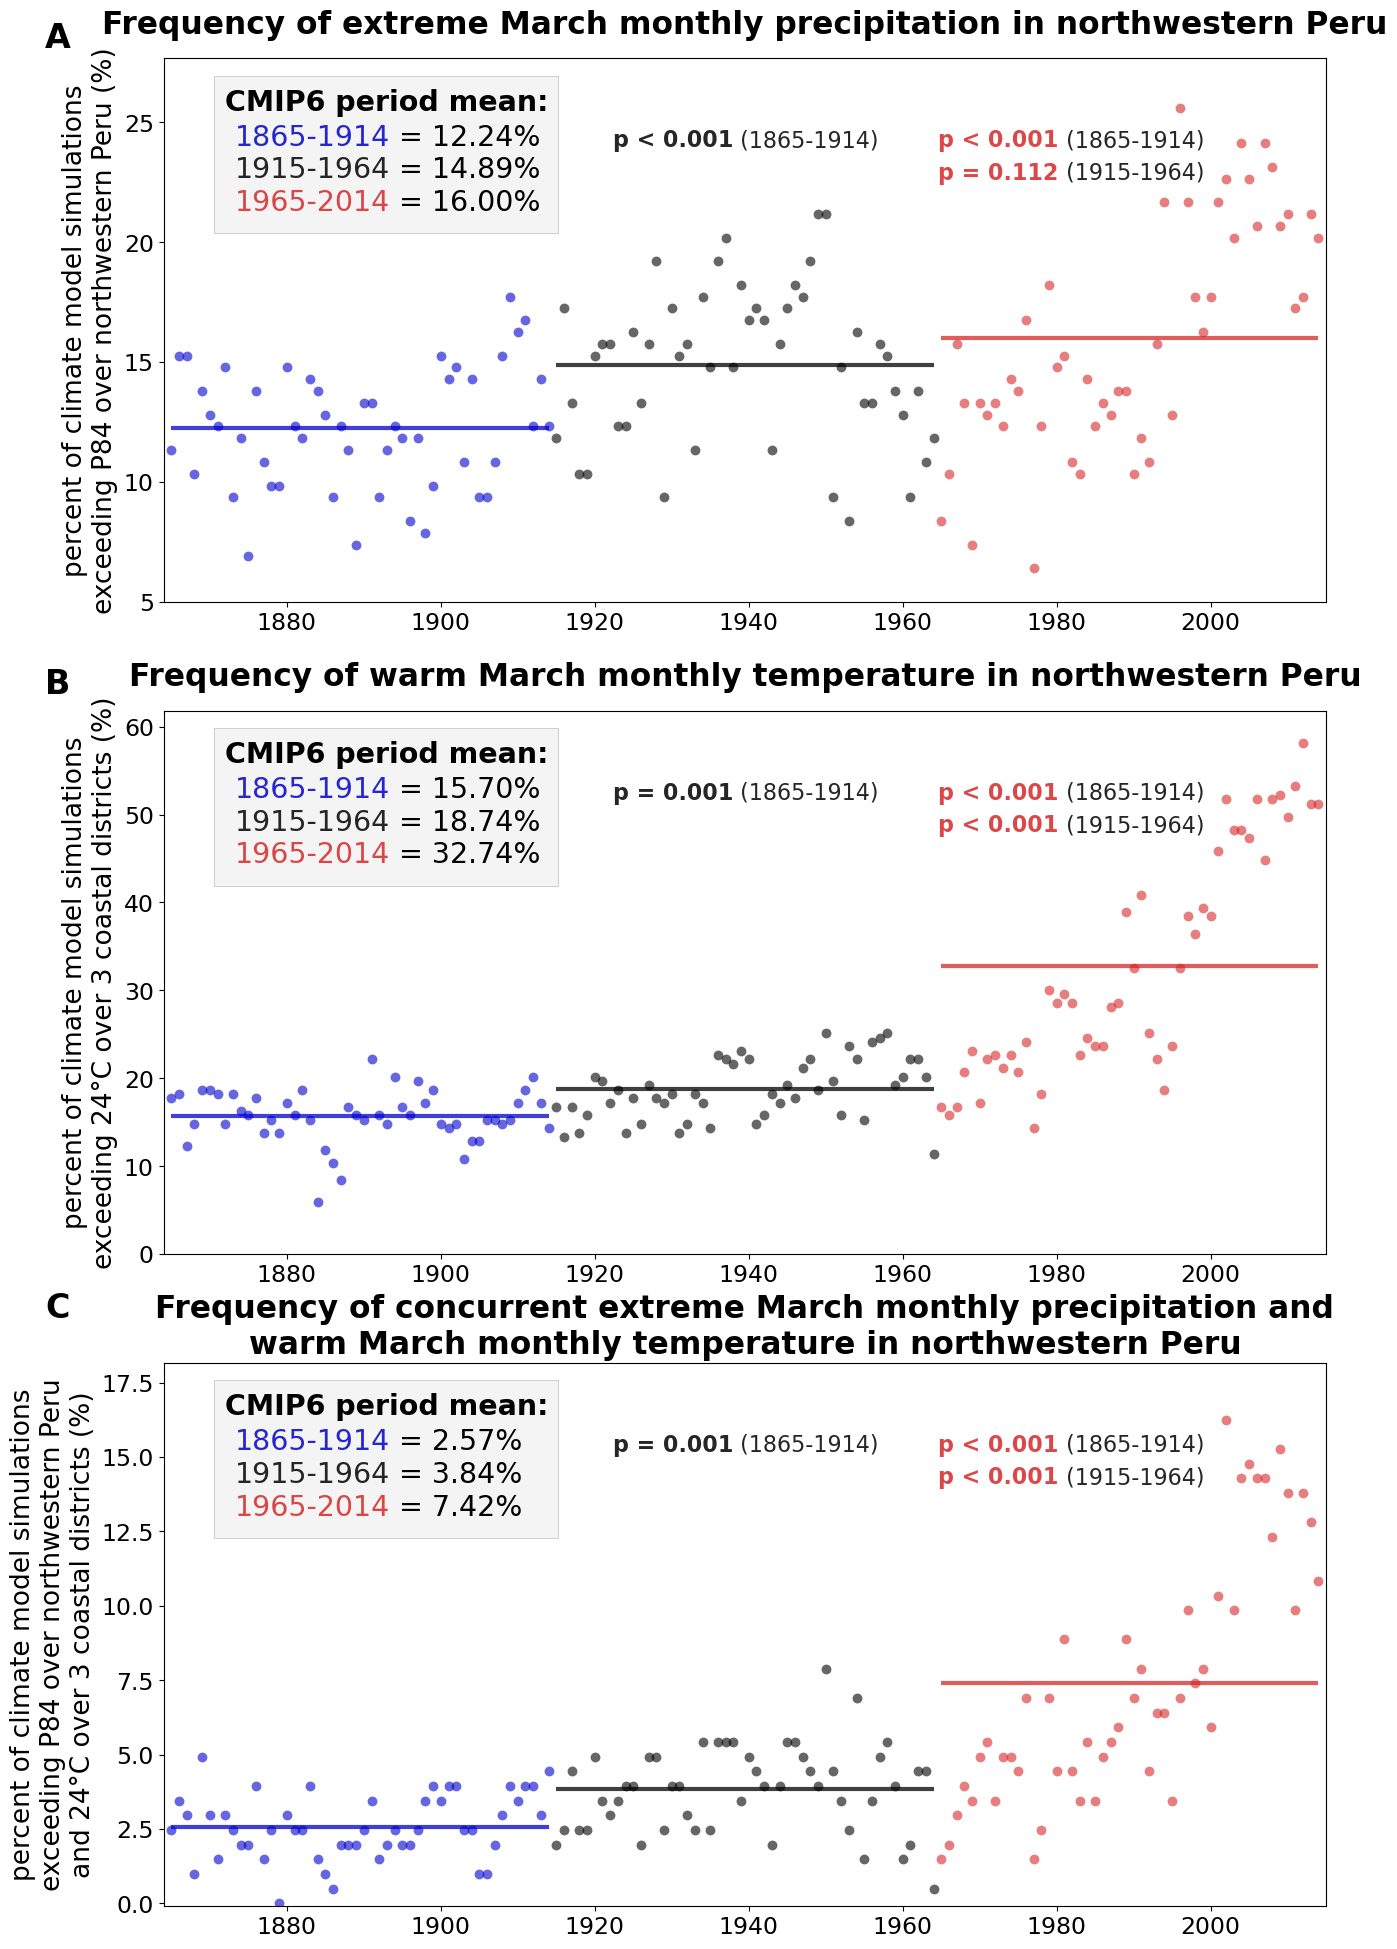

In [18]:
fs = 16
model = model_list[0]
var = variant_list[model_list[0]][0]

fig, ax = plt.subplots(3,1,figsize=(15,24))

for ii, idx in enumerate([wet_idx, hot_idx, hot_wet_idx]):
    fraction = 100*np.mean(idx, axis=0)
    
    ymin_list = [3, 0, -0.1]

    early_idx = year_list[model][var][15:] < 1915
    mid_idx = (year_list[model][var][15:] >= 1915) & (year_list[model][var][15:] < 1965)
    late_idx = year_list[model][var][15:] >= 1965
    
    title_list = ['P'+str(qPR)]
    alph=0.6
    lw=2.5

    ax[ii].scatter(np.arange(1865,1915), fraction[early_idx], color='mediumblue', alpha=alph, s=50, lw=0)
    ax[ii].scatter(np.arange(1915,1965), fraction[mid_idx], color='black', alpha=alph, s=50, lw=0)
    ax[ii].scatter(np.arange(1965,2015), fraction[late_idx], color='tab:red', alpha=alph, s=50, lw=0)
    ax[ii].hlines(np.mean(fraction[early_idx]), xmin=1865, xmax=1914, color='mediumblue', ls='solid', lw=3, alpha=alph+0.15)
    ax[ii].hlines(np.mean(fraction[mid_idx]), xmin=1915, xmax=1964, color='black', ls='solid', lw=3, alpha=alph+0.15)
    ax[ii].hlines(np.mean(fraction[late_idx]), xmin=1965, xmax=2014, color='tab:red', ls='solid', lw=3, alpha=alph+0.15)
    ymax=ax[ii].get_ylim()[1]+1.1
    
    ax[ii].set_xlim(1864,2015)
    ax[ii].set_ylim(ymin_list[ii],ymax)
    ax[ii].tick_params(axis='both', labelsize=fs+1)

    wid=0.14
    lw=1.4

    ax[ii].set_ylim(ymin_list[ii],ymax)
    ax[ii].tick_params(axis='both', labelsize=fs+1)

    if ii==0:
        print('\nPrecipitation-ONLY\n')
    elif ii==1:
        print('\nTemperature-ONLY\n')
    elif ii==2:
        print('\nPrecipitation and Temperature\n')
    
    ############

    ## K-S Test ##
    pval = ks_2samp(fraction[early_idx], fraction[mid_idx]).pvalue
    print('Early-Mid P-value =', pval)
    xadj= 0.19 #-0.02
    yadj= 0.03

    prefix = ''
    suffix = " (1865-1914)"
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.68-xadj,0.90-yadj), color='black', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.68-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.68-xadj,0.90-yadj), color='black',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.68-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    
    pval = ks_2samp(fraction[early_idx], fraction[late_idx]).pvalue
    print('Early-Late P-value =', pval)
    prefix = ''
    suffix = ' (1865-1914)'
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.96-xadj,0.90-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.96-xadj,0.90-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')

    pval = ks_2samp(fraction[mid_idx], fraction[late_idx]).pvalue
    print('Mid-Late P-value =',pval)
    prefix = ''
    suffix = ' (1915-1964)'
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.96-xadj,0.84-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.84-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.96-xadj,0.84-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.84-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    
    ############

    model_explain_str = ''

    if ii==0:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding P84 over northwestern Peru (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of extreme March monthly precipitation in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.03)
    elif ii==1:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding 24\u00B0C over 3 coastal districts (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of warm March monthly temperature in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.03)
    elif ii==2:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding P84 over northwestern Peru\nand 24\u00B0C over 3 coastal districts (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of concurrent extreme March monthly precipitation and\nwarm March monthly temperature in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.001)

    ## Period Means ##
    print('early mean =',np.mean(fraction[early_idx]))
    print('mid mean =',np.mean(fraction[mid_idx]))
    print('late mean =',np.mean(fraction[late_idx]))

    adj=0.04
    xadj = 0.01
    xx = 0.135
    extra_space = '' 
    ax[ii].annotate(extra_space+'                                         \n\n\n\n', xy=(0.038+xadj,0.997-adj), color='black', alpha=1,
                    bbox = dict(facecolor='gainsboro', alpha=0.3, lw=0.4),
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+2.5)
    ax[ii].annotate('CMIP6 period mean:', xy=(0.043+xadj,0.985-adj), color='black', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5, fontweight='semibold')
    ax[ii].annotate('1865-1914', xy=(0.05+xadj+xx,0.92-adj), color='mediumblue', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate('1915-1964', xy=(0.05+xadj+xx,0.86-adj), color='black', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate('1965-2014', xy=(0.05+xadj+xx,0.80-adj), color='tab:red', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[early_idx])))+'%', xy=(0.05+xadj+xx,0.92-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[mid_idx])))+'%', xy=(0.05+xadj+xx,0.86-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[late_idx])))+'%', xy=(0.05+xadj+xx,0.80-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)

    
ax[0].annotate('A', xy=(0.030,0.808-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)
ax[1].annotate('B', xy=(0.030,0.539-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)
ax[2].annotate('C', xy=(0.030,0.279-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)

ax[0].set_ylim(bottom=5)

# plt.tight_layout()
plt.savefig('../figures/'+region_str+'/extreme_March_all_panels.jpg', dpi=500, bbox_inches='tight', pad_inches=0.25)
plt.savefig('../figures/'+region_str+'/extreme_March_all_panels.pdf', dpi=500, bbox_inches='tight', pad_inches=0.25)

# Sensitivity test: Supplemental Figure S29
### Has anthropogenic forcing increased the likelihood of having a warm+wet March? (above PR 84th percentile and TAS 54th percentile)

In [19]:
## calculate 30-year percentile values ##
qPR = 84
pr_84 = {}
qTAS = 54
tas_54 = {}
for jj, model in enumerate(model_list):
    pr_84[model] = {}
    tas_54[model] = {}
    for var in variant_list[model]:
        last_50_yrs_idx = (year_list[model][var] >= 1965) & (year_list[model][var] <= 2014)
        pr_84[model][var] = np.percentile(pr_vals[model][var][last_50_yrs_idx], q=qPR)
        tas_54[model][var] = np.percentile(NW_peru_tas[model][var][last_50_yrs_idx], q=qTAS)

## find months with monthly march precip above 85th percentile and temperature above 50th percentile ##
model = model_list[0]
var = variant_list[model_list[0]][0]
wet_idx = np.ones([len(pr.keys())*len(variant_list[model]), len(pr_vals[model][var])]).astype(int)
hot_idx = np.ones([len(tas.keys())*len(variant_list[model]), len(pr_vals[model][var])]).astype(int)
hot_wet_idx = np.ones([len(tas.keys())*len(variant_list[model]), len(pr_vals[model][var])]).astype(int)
print(np.shape(wet_idx), np.shape(hot_idx), np.shape(hot_wet_idx))

ct = -1
for jj, model in enumerate(model_list):
    for var in variant_list[model]:
        ct = ct+1
        wet_idx[ct,:] = (pr_vals[model][var] >= pr_84[model][var]).astype(int)
        hot_idx[ct,:] = (NW_peru_tas[model][var] >= tas_54[model][var]).astype(int)
        hot_wet_idx[ct,:] = np.bitwise_and(hot_idx[ct,:], wet_idx[ct,:])

wet_idx = wet_idx[:,15:]
hot_idx = hot_idx[:,15:]
hot_wet_idx = hot_wet_idx[:,15:]
print(np.shape(wet_idx), np.shape(hot_idx), np.shape(hot_wet_idx))

(203, 165) (203, 165) (203, 165)
(203, 150) (203, 150) (203, 150)



Precipitation-ONLY

Early-Mid P-value = 0.0002460240344273171
Early-Late P-value = 0.0002460240344273171
Mid-Late P-value = 0.11238524845512393
early mean = 12.236453201970447
mid mean = 14.88669950738916
late mean = 15.999999999999998

Temperature-ONLY

Early-Mid P-value = 1.409544601041165e-13
Early-Late P-value = 1.9823306042836677e-27
Mid-Late P-value = 8.759312877898666e-13
early mean = 12.65024630541872
mid mean = 20.906403940886698
late mean = 45.99999999999999

Precipitation and Temperature

Early-Mid P-value = 4.929118631187453e-07
Early-Late P-value = 3.770852330233186e-17
Mid-Late P-value = 4.929118631187453e-07
early mean = 3.714285714285714
mid mean = 5.684729064039409
late mean = 10.965517241379311


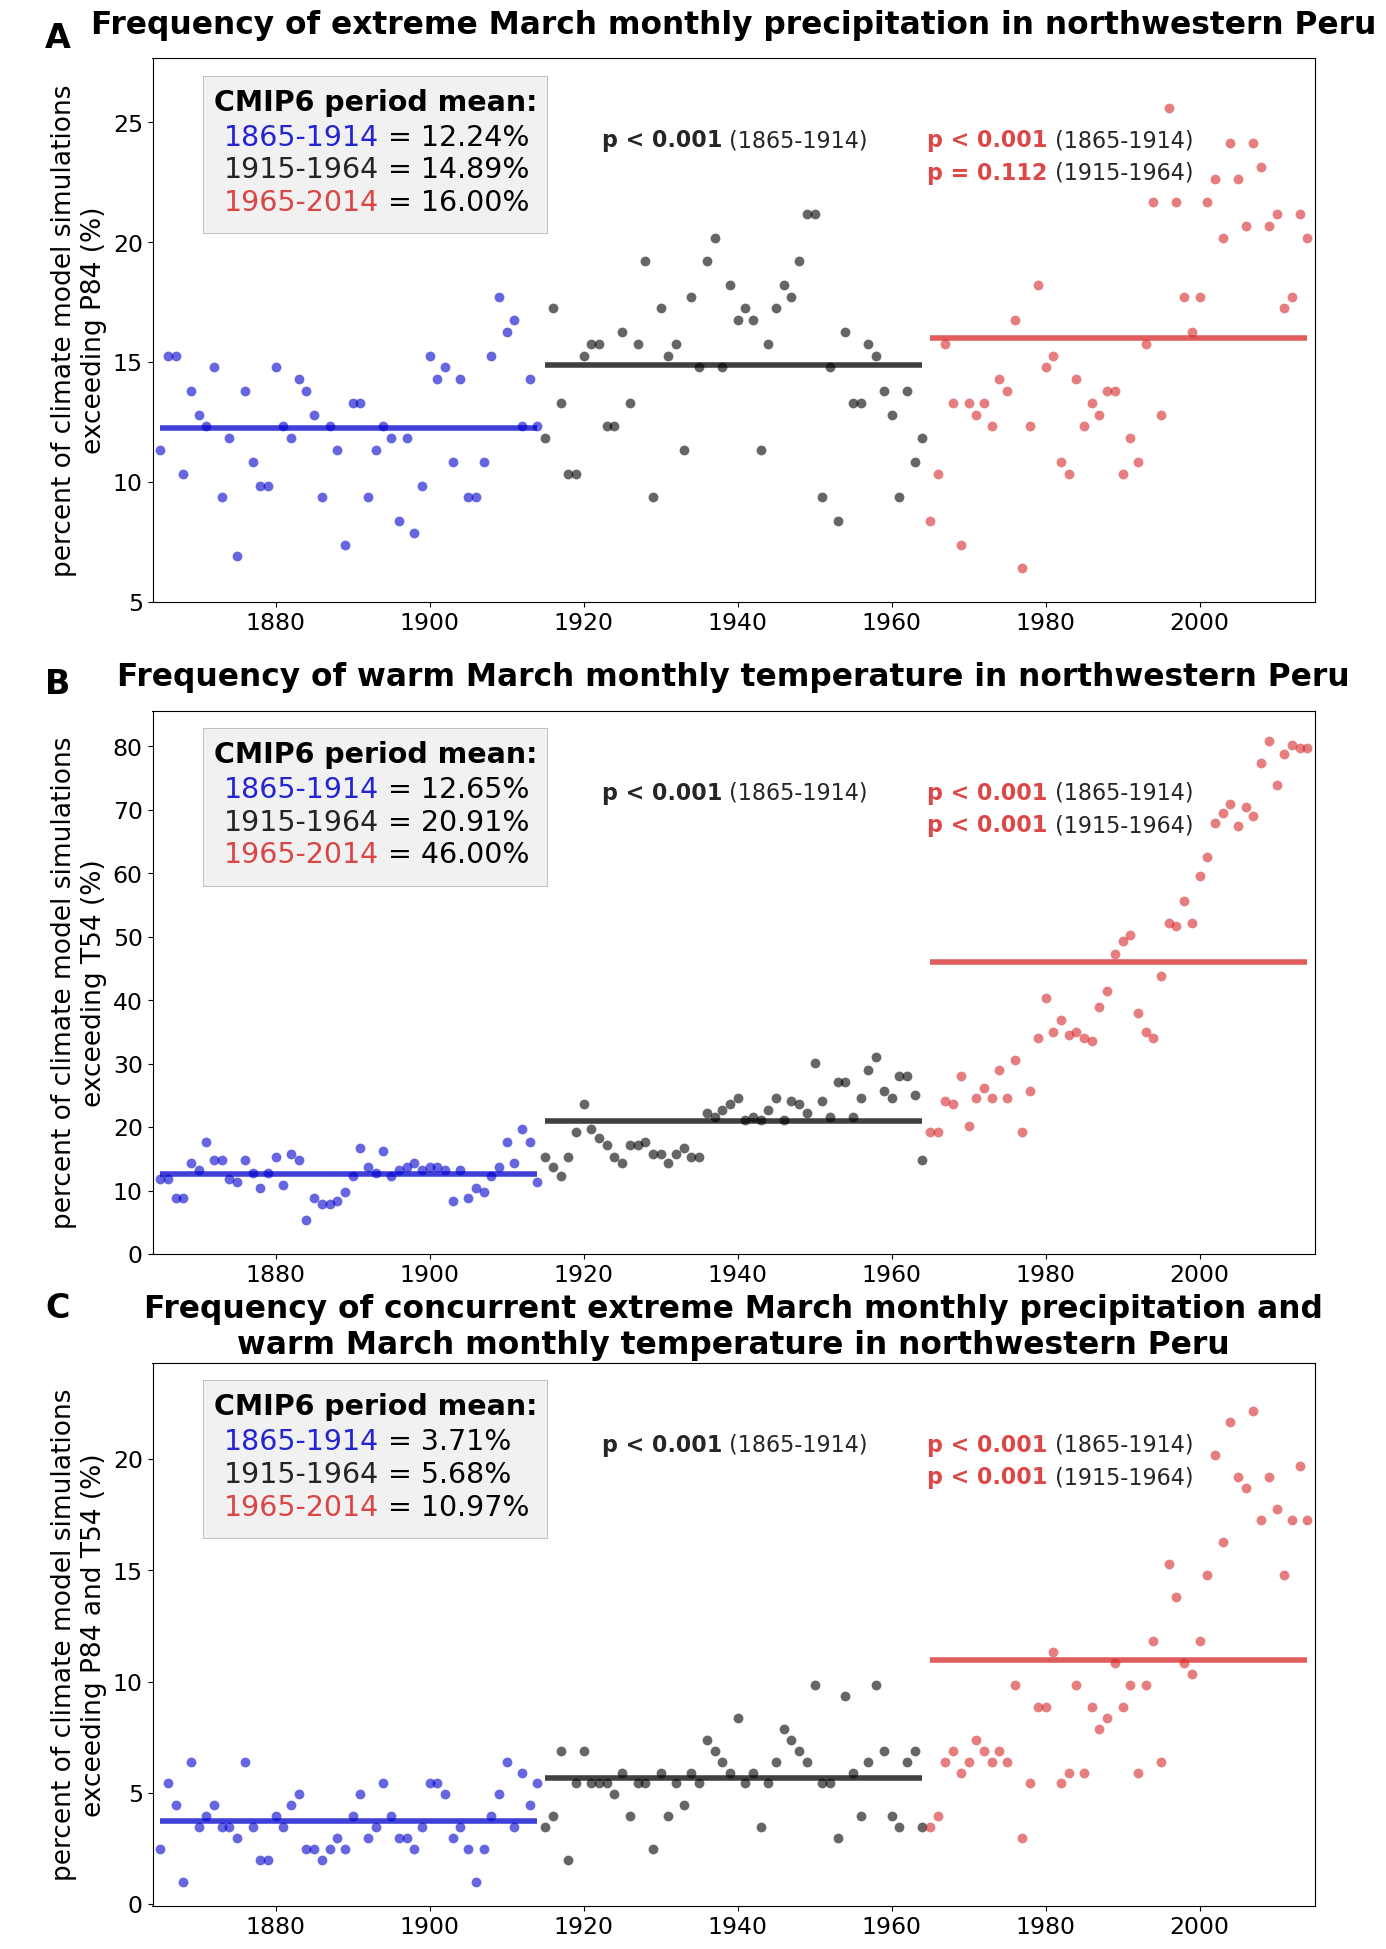

In [20]:
fs = 16
model = model_list[0]
var = variant_list[model_list[0]][0]

fig, ax = plt.subplots(3,1,figsize=(15,24))

for ii, idx in enumerate([wet_idx, hot_idx, hot_wet_idx]):
    fraction = 100*np.mean(idx, axis=0)
    
    ymin_list = [3, 0, -0.1]

    early_idx = year_list[model][var][15:] < 1915
    mid_idx = (year_list[model][var][15:] >= 1915) & (year_list[model][var][15:] < 1965)
    late_idx = year_list[model][var][15:] >= 1965
    
    title_list = ['P'+str(qPR)]
    alph=0.6
    lw=2.5

    ax[ii].scatter(np.arange(1865,1915), fraction[early_idx], color='mediumblue', alpha=alph, s=50, lw=0)
    ax[ii].scatter(np.arange(1915,1965), fraction[mid_idx], color='black', alpha=alph, s=50, lw=0)
    ax[ii].scatter(np.arange(1965,2015), fraction[late_idx], color='tab:red', alpha=alph, s=50, lw=0)
    ax[ii].hlines(np.mean(fraction[early_idx]), xmin=1865, xmax=1914, color='mediumblue', ls='solid', lw=4, alpha=alph+0.15)
    ax[ii].hlines(np.mean(fraction[mid_idx]), xmin=1915, xmax=1964, color='black', ls='solid', lw=4, alpha=alph+0.15)
    ax[ii].hlines(np.mean(fraction[late_idx]), xmin=1965, xmax=2014, color='tab:red', ls='solid', lw=4, alpha=alph+0.15)
    ymax=ax[ii].get_ylim()[1]+1.1
    
    ax[ii].set_xlim(1864,2015)
    ax[ii].set_ylim(ymin_list[ii],ymax)
    ax[ii].tick_params(axis='both', labelsize=fs+1)

    wid=0.14
    lw=1.4

    ax[ii].set_ylim(ymin_list[ii],ymax)
    ax[ii].tick_params(axis='both', labelsize=fs+1)

    if ii==0:
        print('\nPrecipitation-ONLY\n')
    elif ii==1:
        print('\nTemperature-ONLY\n')
    elif ii==2:
        print('\nPrecipitation and Temperature\n')
    
    ############

    ## K-S Test ##
    pval = ks_2samp(fraction[early_idx], fraction[mid_idx]).pvalue
    print('Early-Mid P-value =', pval)
    xadj= 0.19 #-0.02
    yadj= 0.03

    prefix = ''
    suffix = " (1865-1914)"
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.68-xadj,0.90-yadj), color='black', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.68-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.68-xadj,0.90-yadj), color='black',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.68-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    
    pval = ks_2samp(fraction[early_idx], fraction[late_idx]).pvalue
    print('Early-Late P-value =', pval)
    prefix = ''
    suffix = ' (1865-1914)'
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.96-xadj,0.90-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.96-xadj,0.90-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.90-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')

    pval = ks_2samp(fraction[mid_idx], fraction[late_idx]).pvalue
    print('Mid-Late P-value =',pval)
    prefix = ''
    suffix = ' (1915-1964)'
    if pval < 0.001:
        ax[ii].annotate(prefix+'p < 0.001', xy=(0.96-xadj,0.84-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.84-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    else:
        ax[ii].annotate(prefix+'p = '+'{:.3f}'.format(np.round(pval,5)), xy=(0.96-xadj,0.84-yadj), color='tab:red',alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs-0, fontweight='bold')
        ax[ii].annotate(suffix, xy=(0.96-xadj,0.84-yadj), color='k', alpha=alph+0.25, zorder=100,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs-0, fontweight='medium')
    
    ############

    model_explain_str = ''

    if ii==0:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding P84 (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of extreme March monthly precipitation in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.03)
    elif ii==1:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding T54 (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of warm March monthly temperature in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.03)
    elif ii==2:
        ax[ii].set_ylabel('percent of climate model simulations\nexceeding P84 and T54 (%)', fontsize=fs+3)
        ax[ii].set_title('Frequency of concurrent extreme March monthly precipitation and\nwarm March monthly temperature in northwestern Peru'+model_explain_str, 
                           fontsize=fs+6.5, fontweight='bold',x=0.50,y=1.001)

    ## Period Means ##
    print('early mean =',np.mean(fraction[early_idx]))
    print('mid mean =',np.mean(fraction[mid_idx]))
    print('late mean =',np.mean(fraction[late_idx]))

    adj=0.04
    xadj = 0.01
    xx = 0.135
    ax[ii].annotate('                                         \n\n\n\n', xy=(0.038+xadj,0.997-adj), color='black', alpha=1,
                    bbox = dict(facecolor='gainsboro', alpha=0.4, lw=0.4),
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+2.5)
    ax[ii].annotate('CMIP6 period mean:', xy=(0.043+xadj,0.985-adj), color='black', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5, fontweight='semibold')
    ax[ii].annotate('1865-1914', xy=(0.05+xadj+xx,0.92-adj), color='mediumblue', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate('1915-1964', xy=(0.05+xadj+xx,0.86-adj), color='black', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate('1965-2014', xy=(0.05+xadj+xx,0.80-adj), color='tab:red', alpha=alph+0.25,
                    xycoords='axes fraction', ha='right', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[early_idx])))+'%', xy=(0.05+xadj+xx,0.92-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[mid_idx])))+'%', xy=(0.05+xadj+xx,0.86-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)
    ax[ii].annotate(' = '+str('{:.2f}'.format(np.mean(fraction[late_idx])))+'%', xy=(0.05+xadj+xx,0.80-adj), color='k', alpha=1,
                    xycoords='axes fraction', ha='left', va='top', fontsize=fs+4.5)

    
ax[0].annotate('A', xy=(0.030,0.808-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)
ax[1].annotate('B', xy=(0.030,0.539-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)
ax[2].annotate('C', xy=(0.030,0.279-0.005), color='k', alpha=1, fontweight='bold',
                    xycoords='figure fraction', ha='left', va='top', fontsize=fs+8)

ax[0].set_ylim(bottom=5)
# plt.tight_layout()
plt.savefig('../figures/'+region_str+'/sensitivity_test_extreme_March_all_panels.jpg', dpi=500, bbox_inches='tight', pad_inches=0.25)
plt.savefig('../figures/'+region_str+'/sensitivity_test_extreme_March_all_panels.pdf', dpi=500, bbox_inches='tight', pad_inches=0.25)

In [21]:
print('done')

done


# Supplemental Figure S28: ERA5 percentile corresponding to 24$^\circ$C

24.022281162323118


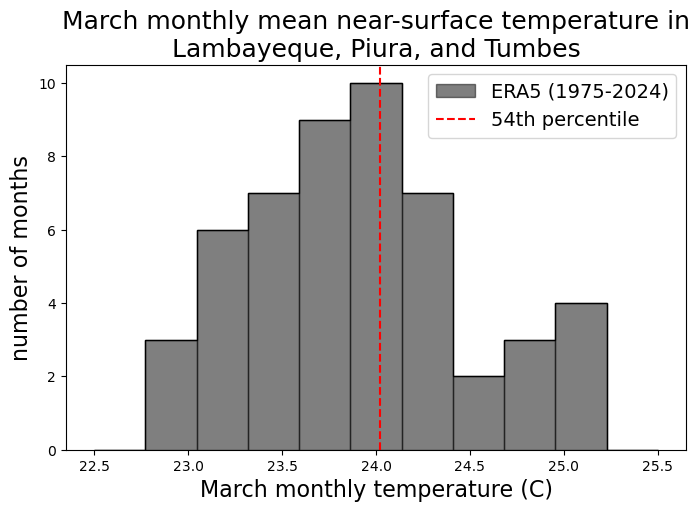

In [22]:
ERA5_masked_qq = ERA5_tas*Both_mask
weights = np.cos(np.deg2rad(ERA5_tas.lat))
fig = plt.figure(figsize=(8,5))
weights.name = "weights"
mean_ERA5_tas = ERA5_masked_qq.weighted(weights).mean(dim=['lat', 'lon']).values
plt.hist(mean_ERA5_tas, color='k', lw=1, histtype='bar', edgecolor='k', bins=np.linspace(22.5,25.5,12), alpha=0.5, label='ERA5 (1975-2024)')
plt.hist(mean_ERA5_tas, color='k', lw=1, histtype='step', edgecolor='k', bins=np.linspace(22.5,25.5,12), alpha=1)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=np.quantile(mean_ERA5_tas, q=0.54), ymin=0, ymax=ymax, color='r', ls='dashed', label='54th percentile')
print(np.quantile(mean_ERA5_tas, q=0.54))
plt.gca().set_ylim(ymin, ymax)
plt.legend(fontsize=14)
plt.xlabel('March monthly temperature (C)', fontsize=16)
plt.ylabel('number of months', fontsize=16)
plt.title('March monthly mean near-surface temperature in\nLambayeque, Piura, and Tumbes', fontweight='medium', fontsize=18)
plt.savefig('../figures/'+region_str+'/Supplemental_Figure_S28.jpg', dpi=500, bbox_inches='tight', pad_inches=0.2)
plt.savefig('../figures/'+region_str+'/Supplemental_Figure_S28.pdf', dpi=500, bbox_inches='tight', pad_inches=0.2)

# Plot Supplemental Figure S27

ACCESS-ESM1-5
CanESM5
CNRM-CM6-1
IPSL-CM6A-LR
MIROC6
MIROC-ES2L
NorCPM1


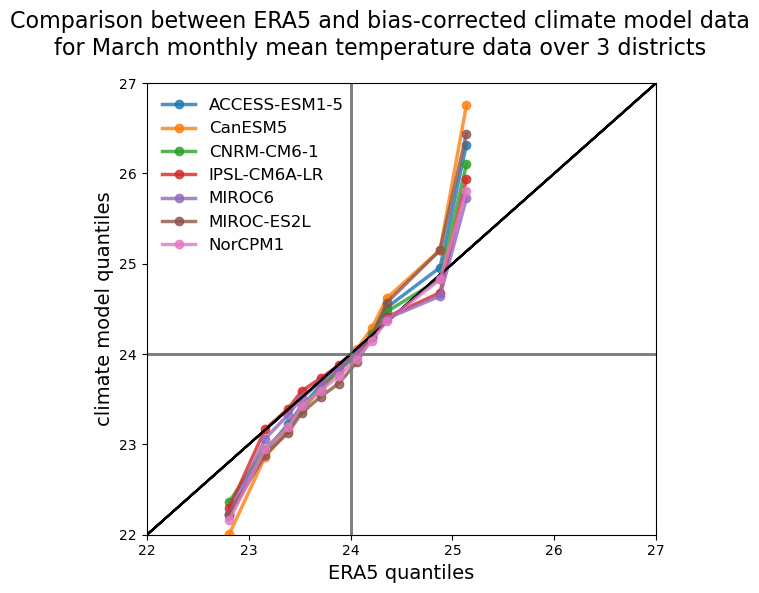

In [23]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for kk, model in enumerate(model_list):
    print(model)
    yy = []
    for ll, var in enumerate(variant_list[model]):
        # yr_idx = np.isin(BCSD_tas[model][var][:,0,0].time.dt.year, np.arange(1975,2015))
        yr_idx = np.isin(BCSD_tas[model][var][:,0,0].time.dt.year, np.arange(1985,2015))
        yy.append(mean_BCSD_tas[model][var][yr_idx])

    yy = np.concatenate(yy)
    
    fs = 14
    
    xx = ERA5_mean_tas
    
    percs = np.linspace(0,100,11)
    qq_xx = np.percentile(xx, percs)
    qq_yy = np.percentile(yy, percs)
    
    ax.plot([22,27], [22,27], color='k')
    ax.plot(qq_xx, qq_yy, marker='o', label=model, lw=2.5, alpha=0.8)
    ax.set_xlim(22,27)
    ax.set_ylim(22,27)

    ax.vlines(x=24, ymin=22, ymax=27, color='gray', lw=2, alpha=0.5)
    ax.hlines(y=24, xmin=22, xmax=27, color='gray', lw=2, alpha=0.5)
    
    ax.set_xlabel('ERA5 quantiles', fontsize=fs)
    ax.set_ylabel('climate model quantiles', fontsize=fs)

ax.legend(fontsize=fs-2, ncol=1, framealpha=0)
fig.suptitle('Comparison between ERA5 and bias-corrected climate model data\nfor March monthly mean temperature data over 3 districts', fontsize=fs+2)
plt.tight_layout()
plt.savefig('../figures/'+region_str+'/Supplemental_Figure_S27_qq_plot.jpg', dpi=300, bbox_inches = 'tight', pad_inches = 0.2)

# Supplemental Figure S25: Region Map for Northwest Peru

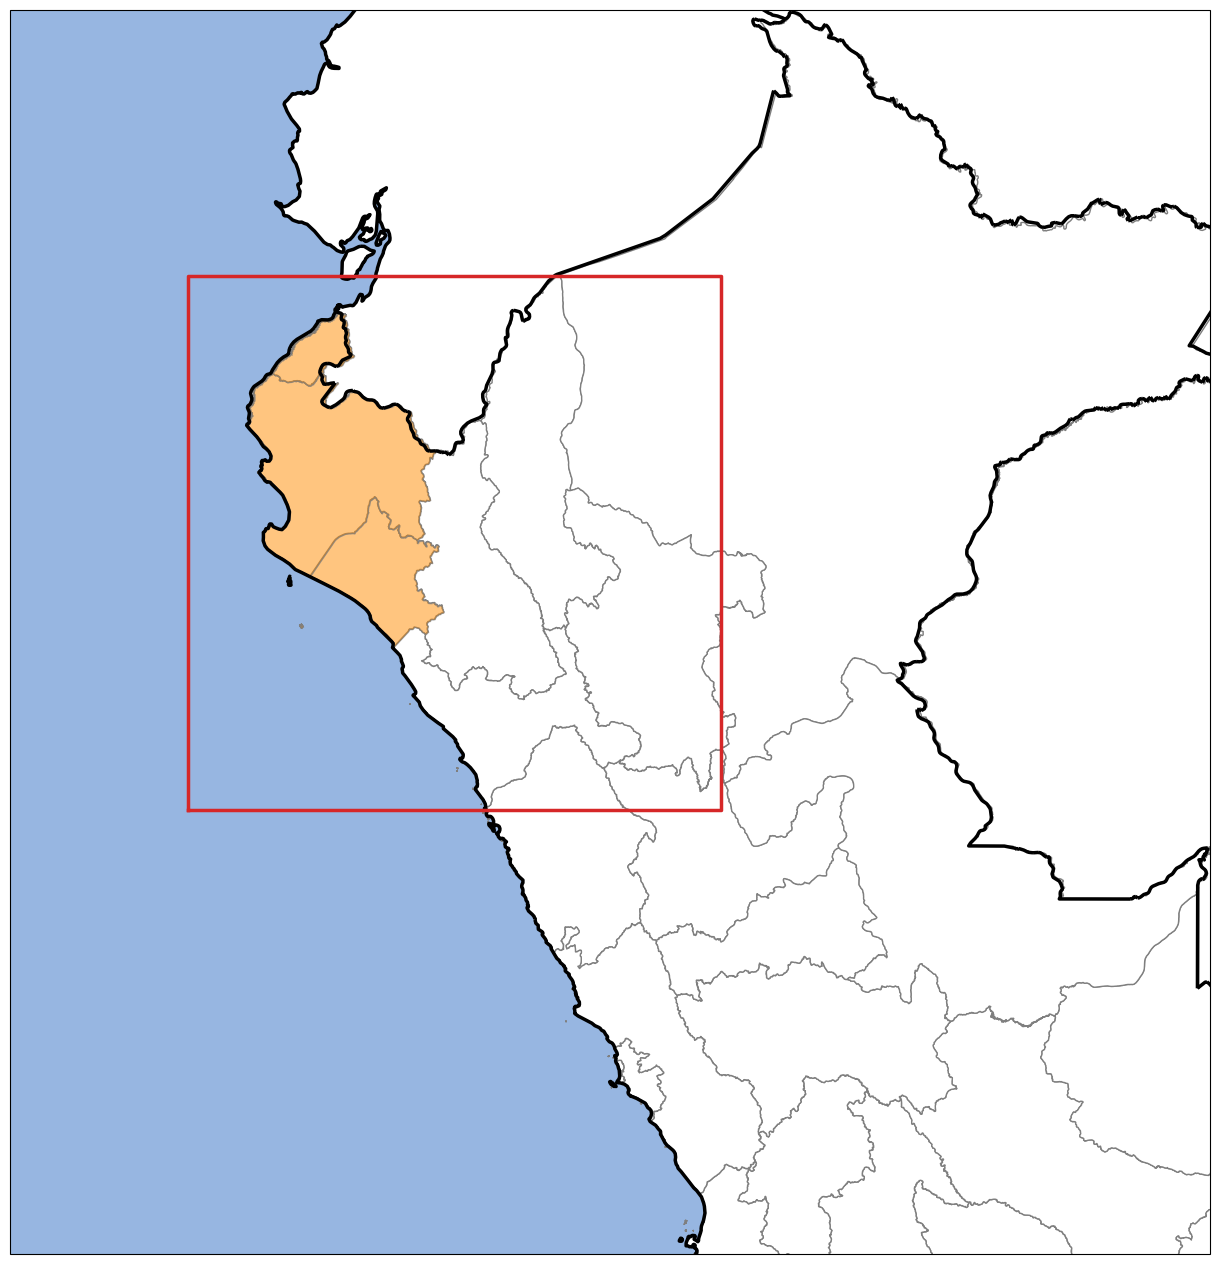

In [24]:
region_str = 'northwest_peru'

fs = 20

fig = plt.figure(figsize=(15,16))
ax1 = fig.add_axes([0.05, 0.05, 0.80, 0.80], projection=ccrs.PlateCarree())

ax1.add_feature(cfeature.OCEAN, ec='k')
ax1.add_feature(cfeature.LAKES, ec='tab:blue', lw=0.5)

ocean_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m',
                                        edgecolor='k',
                                        facecolor='white')
ax1.add_feature(ocean_50m)
ax1.add_geometries(Reader('../input_data/shapefiles/PER_adm1.shp').geometries(),
              ccrs.PlateCarree(),
              facecolor='white', ec='tab:gray')

shapefile = gpd.read_file('../input_data/shapefiles/PER_adm1.shp').to_crs(ccrs.PlateCarree())
for name in ['Lambayeque', 'Piura', 'Tumbes']:
    ax1.add_geometries(shapefile[shapefile['NAME_1'] == name].geometry,
                  ccrs.PlateCarree(),
                  facecolor='darkorange', alpha=0.5, ec='tab:gray')


ax1.add_feature(cfeature.BORDERS, ec='k', lw=2.5)
ax1.add_feature(cfeature.COASTLINE, ec='k', lw=2.5)
ax1.set_extent([-84,-70.5,-14,0])

ax1.plot([-82, -76, -76, -82, -82], [-9, -9, -3, -3, -9],
         color='tab:red', linewidth=2.5, marker='')

plt.savefig('../figures/'+region_str+'/Supplemental_Figure_S25_'+region_str+'_map.jpg', dpi=500, bbox_inches='tight', pad_inches=0.2)
plt.savefig('../figures/'+region_str+'/Supplemental_Figure_S25_'+region_str+'_map.pdf', dpi=500, bbox_inches='tight', pad_inches=0.2)